In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [94]:
csv_path = './export.csv'

In [95]:
df = pd.read_csv(csv_path)
df.head()

,Date,Tipo,Colore,Nastriformi?,Aria nella pancia,Altri sintomi,Numero evacuazioni,Name,Farmaci (da <12h),Variazioni nella dieta (ultime 24h)
0,"February 2, 2023 21:50",4- morbide a forma di salsiccia o serpente,Marrone,No,"Alto DX (15cm sopra ombelico), Poco, Stomaco (...","Borborigmi, Frammenti di verdura",1.0,2/2 21:50,Enterelle,Dieta mediterranea
1,"February 2, 2023 16:50",5- Frammenti morbidi con bordi ben definiti,Marrone,No,No,Frammenti di verdura,1.0,2/2 16:50,Enterelle,Dieta mediterranea
2,"February 2, 2023 15:00",4- morbide a forma di salsiccia o serpente,Marrone scuro,No,No,Nessuno,1.0,2/2 15:05,Enterelle,Dieta mediterranea
3,"February 2, 2023 8:00",5- Frammenti morbidi con bordi ben definiti,Marrone,No,"Poco, Sotto ombelico, Stomaco (15cm sopra ombe...",Borborigmi,1.0,2/2 08:00,Enterelle,Dieta mediterranea
4,"February 1, 2023 20:15",4- morbide a forma di salsiccia o serpente,Marrone,No,"Poco, Stomaco (15cm sopra ombelico)",Borborigmi,1.0,1/2 20:15,Enterelle,Dieta mediterranea


In [96]:
def convert(x):
    try:
        return pd.to_datetime(x, format='%B %d, %Y %H:%M')
    except Exception:
        try:
            return pd.to_datetime(x, format='%B %d, %Y %H:%M (EDT)')
        except Exception:
            return pd.to_datetime(x, format='%B %d, %Y')

df['Date'] = df['Date'].apply(convert) 
df = df.rename(columns={'Farmaci (da <12h)':'Farmaci', 'Variazioni nella dieta (ultime 24h)': 'Variazioni'})

In [97]:
df.head()
df = df[df['Date'] >= '2023-01-01']

In [98]:
type_to_number = {
    '5- Frammenti morbidi con bordi ben definiti' : 5,
    '4- morbide a forma di salsiccia o serpente' : 4,
    '3- a salsiccia con crepe in superficie' : 3,
    '6- Frammenti morbidi con bordi frastagliati' : 6,
    '7- liquide senza pezzi solidi' : 7,
    '2- a forma di salsiccia nodose' : 2,
    '1- a palline feci caprine feci a scibala' : 1,
    'Non determinato' : 0
}

number_to_type = {
    5:'5- Frammenti morbidi con bordi ben definiti',
    4:'4- morbide a forma di salsiccia o serpente',
    3:'3- a salsiccia con crepe in superficie',
    6:'6- Frammenti morbidi con bordi frastagliati',
    7:'7- liquide senza pezzi solidi',
    2:'2- a forma di salsiccia nodose',
    1:'1- a palline feci caprine feci a scibala',
    0:'Non determinato'
}

dd = df.copy()
dd = dd.dropna(how='all')
dd['Tipo'] = dd['Tipo'].apply(lambda x: type_to_number[x])
dd = dd[dd['Tipo']>0]

## Plotting raw data

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


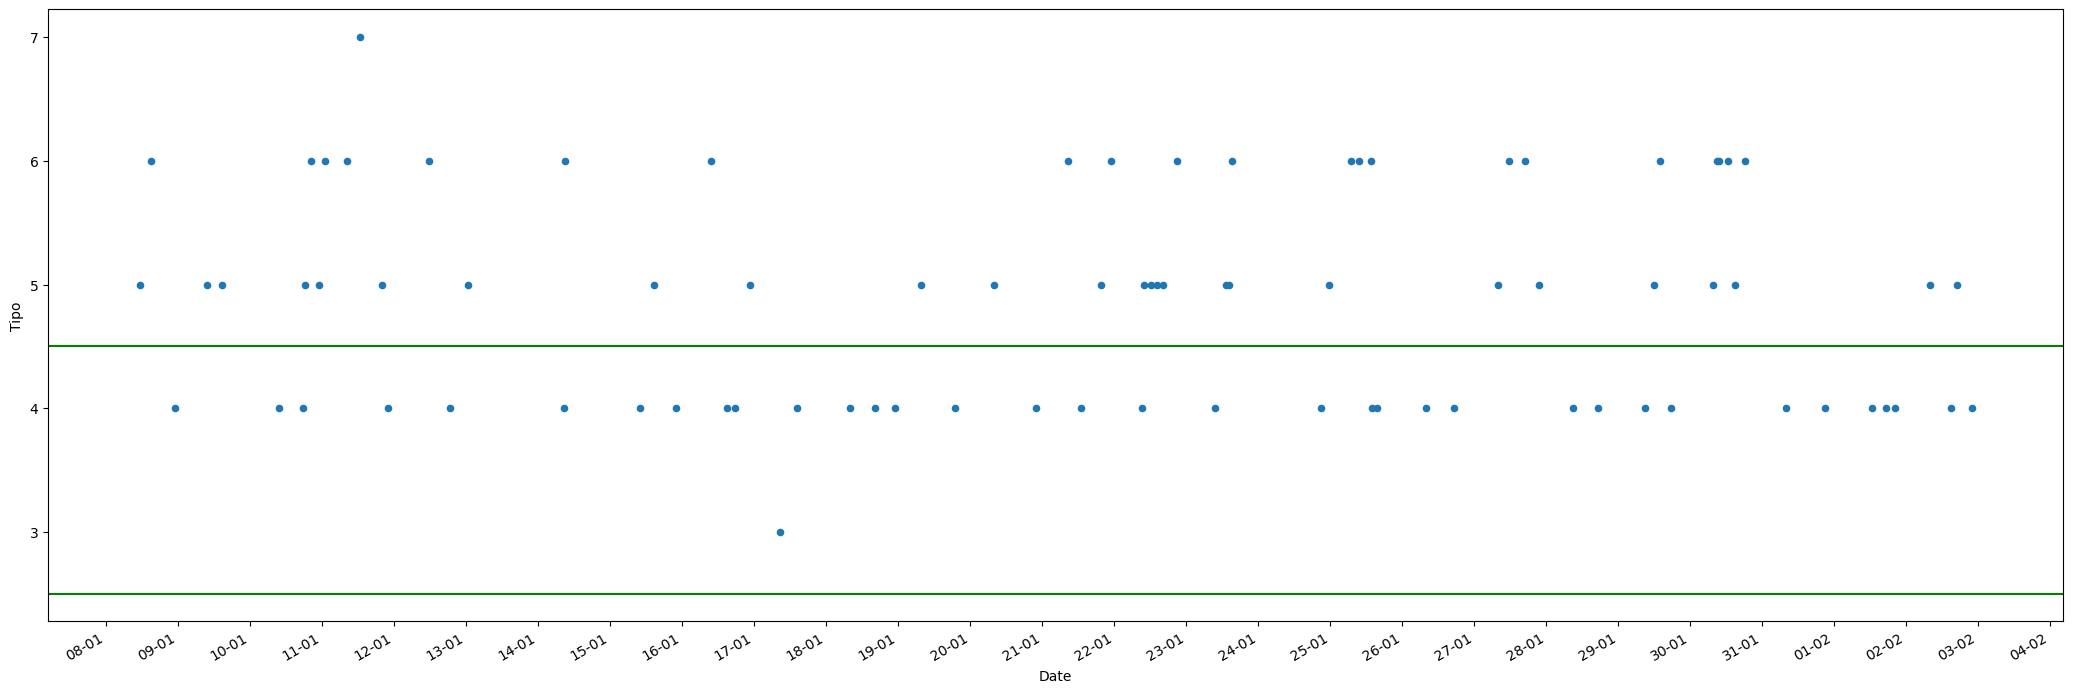

In [99]:
rr = dd[['Date','Tipo']]
ax = rr.plot(x='Date', y='Tipo', kind='scatter',figsize=(26,9))
plt.axhline(y = 2.5, color = 'g', linestyle = '-')
plt.axhline(y = 4.5, color = 'g', linestyle = '-')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gcf().autofmt_xdate()


## Plotting type data

Rappresentazione del dataset in base relativamente al tipo (secondo la scala di Bristol) come classificato, raggruppato per date, conteggiando il numero di eventi di una determinata tipologia

<AxesSubplot: ylabel='Tipo'>

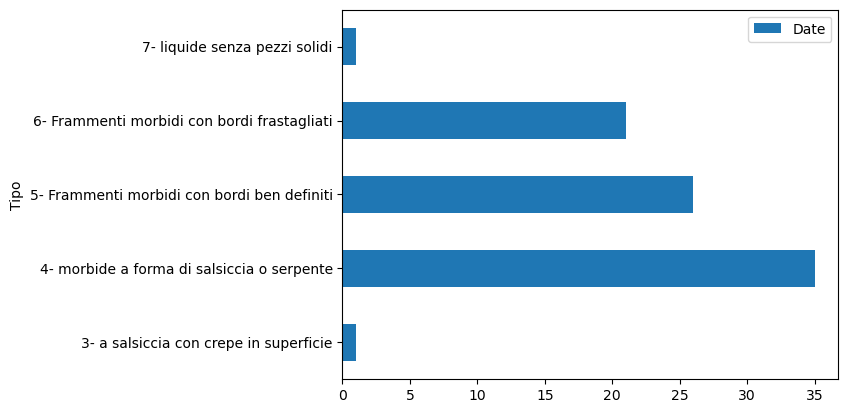

In [100]:
grouped_by_type = df.groupby('Tipo').count()
grouped_by_type = grouped_by_type[['Date']]
grouped_by_type.plot(kind='barh')

Riclassificazione dei dati considerando i tipi 1 e 2 come **stitichezza**, i tipi 3, 4, 5 come **normale** ed i tipi 6 e 7 come **diarrea**

<AxesSubplot: ylabel='Tipo'>

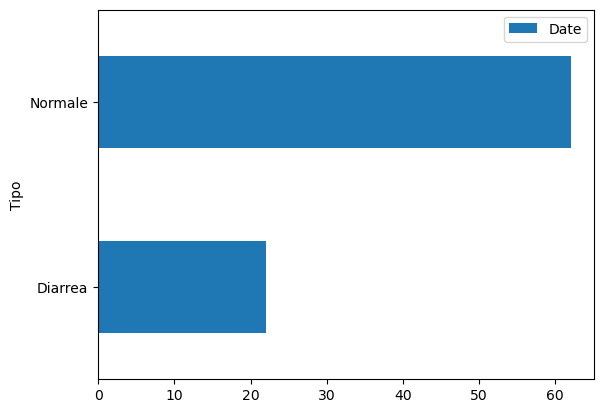

In [101]:
bucketed_by_type = dd.copy()

def classify(x):
    if x < 3: 
        return 'Stitichezza'
    elif x < 6: 
        return 'Normale'
    else:
        return 'Diarrea'

bucketed_by_type['Tipo'] = bucketed_by_type['Tipo'].apply(classify)
bucketed_by_type = bucketed_by_type.groupby('Tipo').count()
bucketed_by_type = bucketed_by_type[['Date']]
bucketed_by_type.plot(kind='barh')

Se il tipo 5 (Frammenti morbidi con bordi ben definiti) viene considerato come principio di diarrea, il grafico cambia come segue

<AxesSubplot: ylabel='Tipo'>

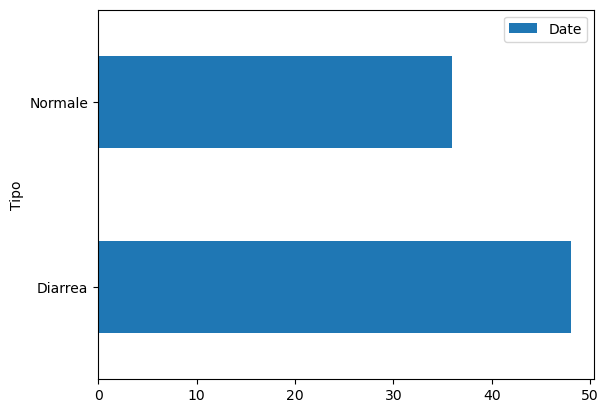

In [102]:
bucketed_by_type = dd.copy()

def classify(x):
    if x < 3: 
        return 'Stitichezza'
    elif x < 5: 
        return 'Normale'
    else:
        return 'Diarrea'

bucketed_by_type['Tipo'] = bucketed_by_type['Tipo'].apply(classify)
bucketed_by_type = bucketed_by_type.groupby('Tipo').count()
bucketed_by_type = bucketed_by_type[['Date']]
bucketed_by_type.plot(kind='barh')

## Analisi dei dati

Classificazione dei dati in base alla data dell'evento

In [103]:
median = dd['Tipo'].median()
mode = median = dd['Tipo'].mode()[0]
print(f'La mediana delle evacuazioni è {number_to_type[median]}. \nLa moda è {number_to_type[mode]}')

La mediana delle evacuazioni è 4- morbide a forma di salsiccia o serpente. 
La moda è 4- morbide a forma di salsiccia o serpente


### Giorni normali e giorni con colite

In [104]:
byDate = dd.copy()
byDate['Date'] = byDate['Date'].dt.date
bd = byDate.groupby('Date')['Tipo'].max()
bd = bd.reset_index()
days_w_diarrhea = bd[bd['Tipo']>5]['Date'].count()
days_w_normal = bd[(bd['Tipo']<6) & (bd['Tipo']>2)]['Date'].count()

In [105]:
print(f'Su un totale di {len(bd)} giorni si sono verificati '
      f'{days_w_normal} con alvo normale, '
      f'{days_w_diarrhea} con almeno un episodio di diarrea.\n'
      f'Considerando il tipo 5 come appartenente al gruppo normale')

Su un totale di 26 giorni si sono verificati 13 con alvo normale, 13 con almeno un episodio di diarrea.
Considerando il tipo 5 come appartenente al gruppo normale


### Analisi evacuazioni giornaliere

<AxesSubplot: xlabel='Date'>

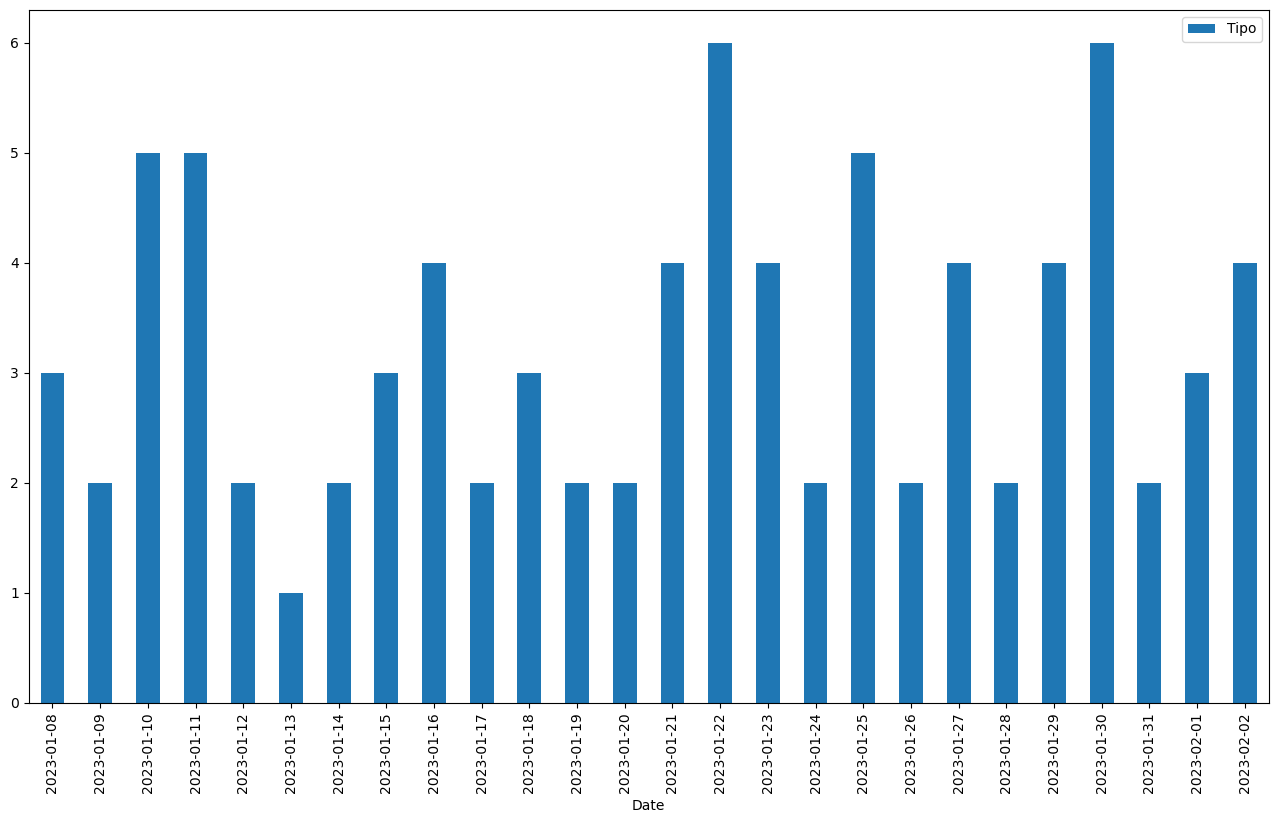

In [106]:
fc = byDate[['Date','Tipo']].groupby('Date').count()
fc.plot(kind='bar',figsize=(16,9))

In [107]:
print(f'La media di evacuazioni giornaliere è {fc["Tipo"].mean()}.\n'
      f'Giornalmente è più frequente il caso con mediana {fc["Tipo"].median()} evacuazioni'
      f'e moda {fc["Tipo"].mode()[0]} evacuazioni')

La media di evacuazioni giornaliere è 3.230769230769231.
Giornalmente è più frequente il caso con mediana 3.0 evacuazionie moda 2 evacuazioni


## Analisi in base al farmaco assunto

In [108]:
def plot_medicine(medicine, x_interval=1):
    fa = df.copy()
    fa['Farmaci'] = fa['Farmaci'].dropna()

    def fi(x): 
        try:
            return x.find(medicine) > -1
        except:
            return False

    fa[medicine] = fa['Farmaci'].apply(fi)
    dfa = fa[fa[medicine]]

    dfa = dfa.set_index('Date')
    dfa = dfa['Tipo']
    dfa = dfa.reset_index()
    dfa['Tipo'] = dfa['Tipo'].apply(lambda x: type_to_number[x])
    ax = dfa.plot(x='Date', y='Tipo', kind='scatter',figsize=(16,9))
    plt.axhline(y = 2.5, color = 'g', linestyle = '-')
    plt.axhline(y = 4.5, color = 'g', linestyle = '-')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=x_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate()
    plt.ylim([1,7])
    
    grouped_by_type = dfa
    grouped_by_type['Tipo'] = grouped_by_type['Tipo'].apply(lambda x: number_to_type[x])
    grouped_by_type = grouped_by_type.groupby('Tipo').count()
    grouped_by_type = grouped_by_type[['Date']]
    grouped_by_type.plot(kind='barh')

Grafico dei dati in relazione all'assunzione di Valpinax 2% 12 gocce mattino e sera.
A seguire analisi degli episodi di feci.

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

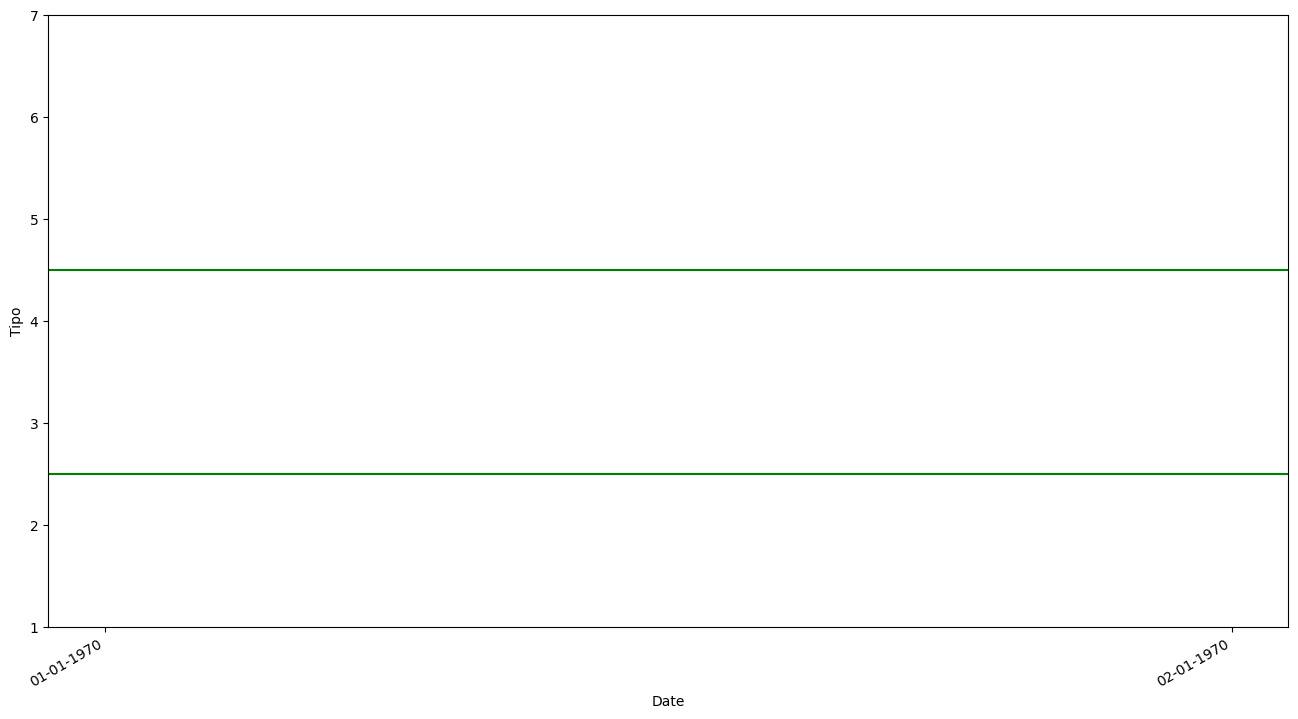

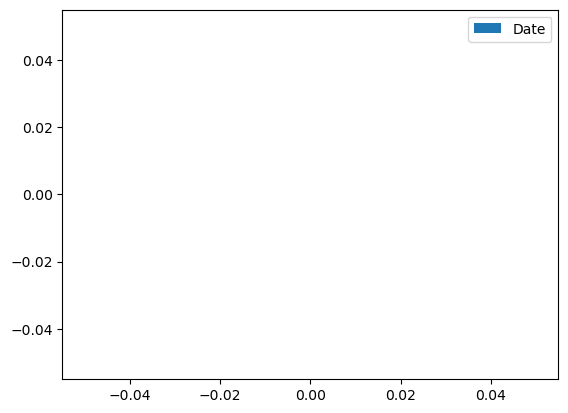

In [109]:
plot_medicine('Valpinax')

Grafico dei dati in relazione all'assunzione di Levopraid mattino e sera.
A seguire analisi degli episodi di feci.

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

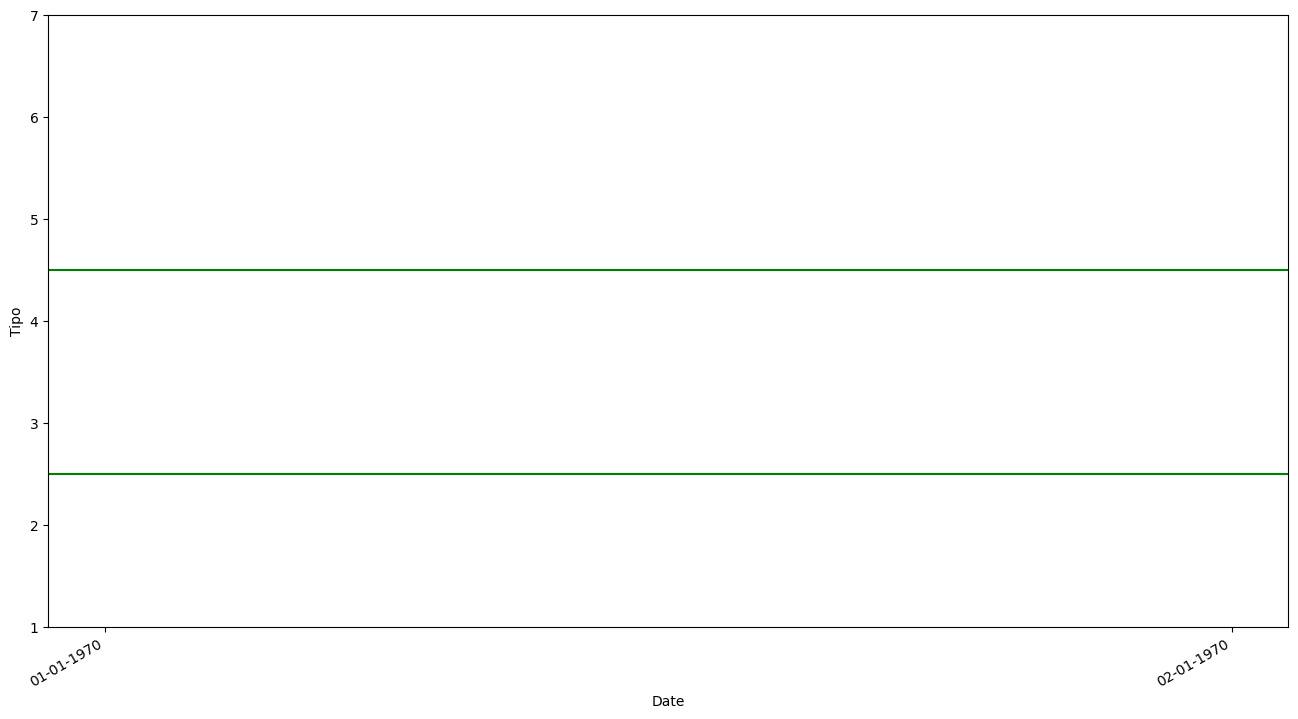

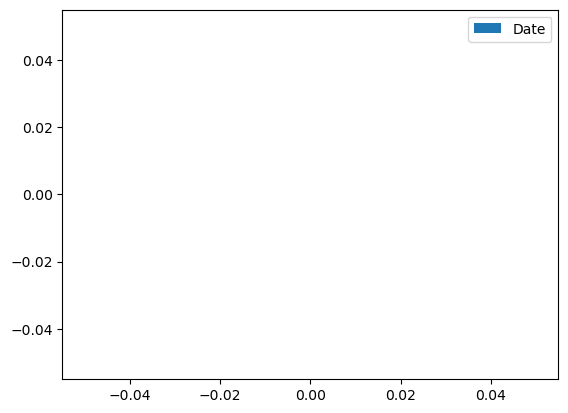

In [110]:
plot_medicine('Levopraid')

Grafico dei dati in relazione all'assunzione di VLS#3.
A seguire analisi degli episodi di feci.

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

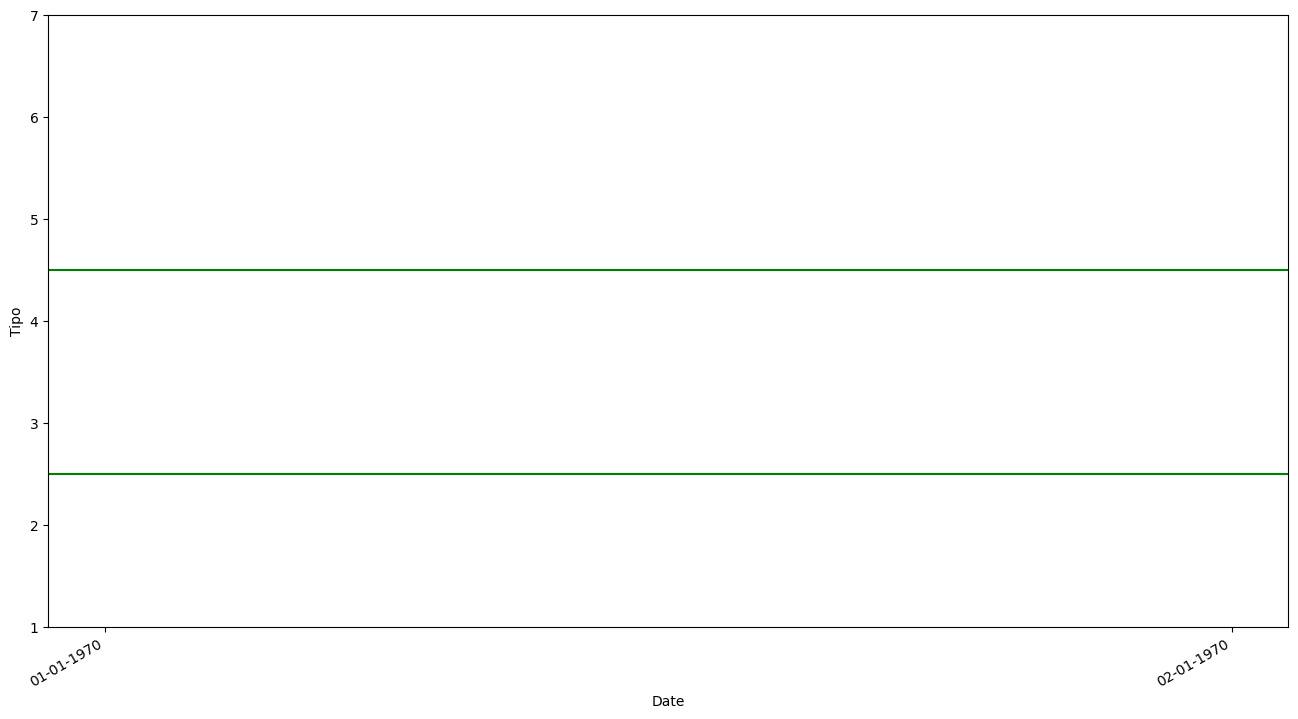

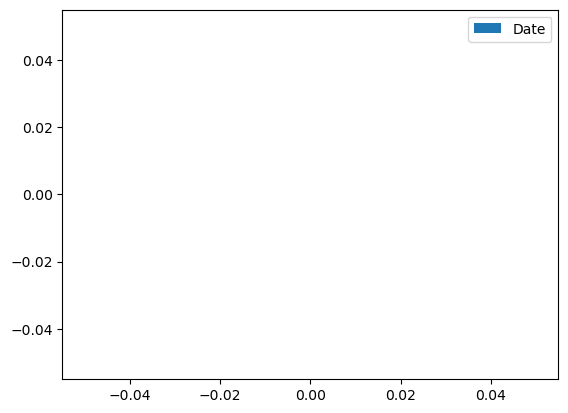

In [111]:
plot_medicine('VLS#3')

Grafico dei dati in relazione all'assunzione di Enterolactics Plus una volta al giorno.
A seguire analisi degli episodi di feci.

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

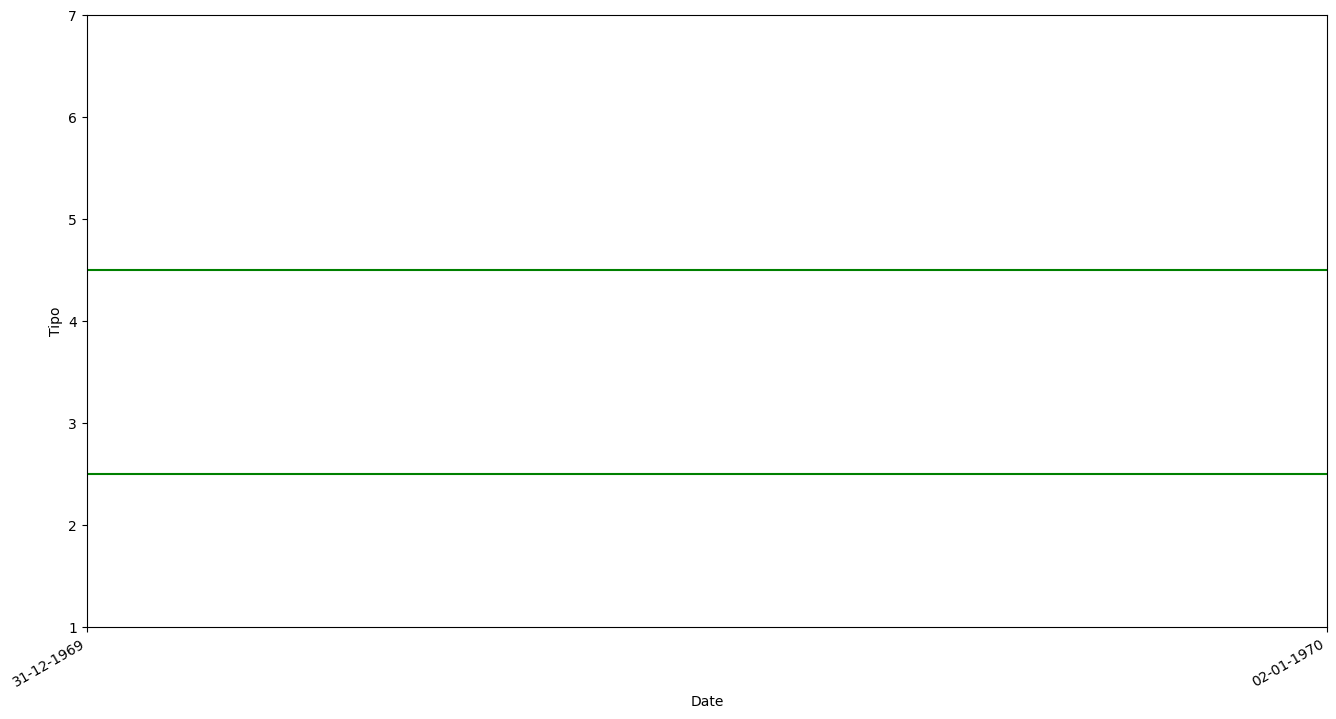

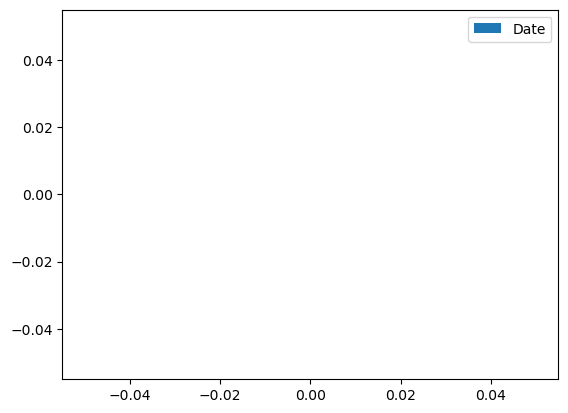

In [112]:
plot_medicine('Enterolacti',4)

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


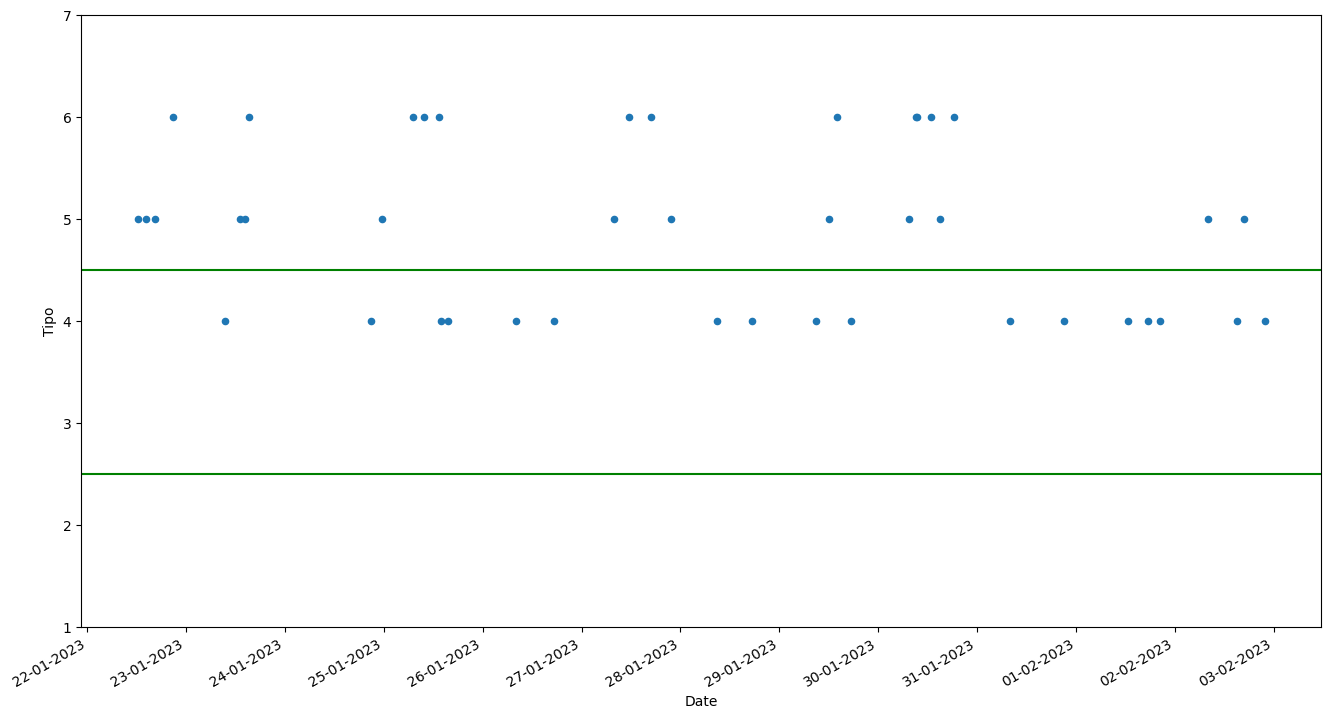

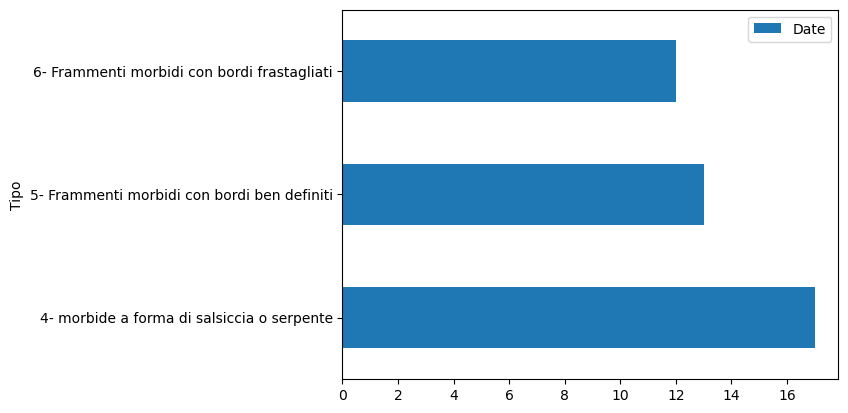

In [113]:
plot_medicine('Enterelle')

## Analisi in base alle abitudini alimentari


In [114]:
def plot_lifestyle(lifestyle, x_interval=1):
    fa = df.copy()
    fa['Variazioni'] = fa['Variazioni'].dropna()

    def fi(x): 
        try:
            return x.find(lifestyle) > -1
        except:
            return False

    fa[lifestyle] = fa['Variazioni'].apply(fi)
    dfa = fa[fa[lifestyle]]

    dfa = dfa.set_index('Date')
    dfa = dfa['Tipo']
    dfa = dfa.reset_index()
    dfa['Tipo'] = dfa['Tipo'].apply(lambda x: type_to_number[x])
    ax = dfa.plot(x='Date', y='Tipo', kind='scatter',figsize=(16,9))
    plt.axhline(y = 2.5, color = 'g', linestyle = '-')
    plt.axhline(y = 4.5, color = 'g', linestyle = '-')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=x_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate()
    plt.ylim([1,7])
    
    grouped_by_type = dfa
    grouped_by_type['Tipo'] = grouped_by_type['Tipo'].apply(lambda x: number_to_type[x])
    grouped_by_type = grouped_by_type.groupby('Tipo').count()
    grouped_by_type = grouped_by_type[['Date']]
    grouped_by_type.plot(kind='barh')

Eliminazione cibi integrali dalla dieta

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


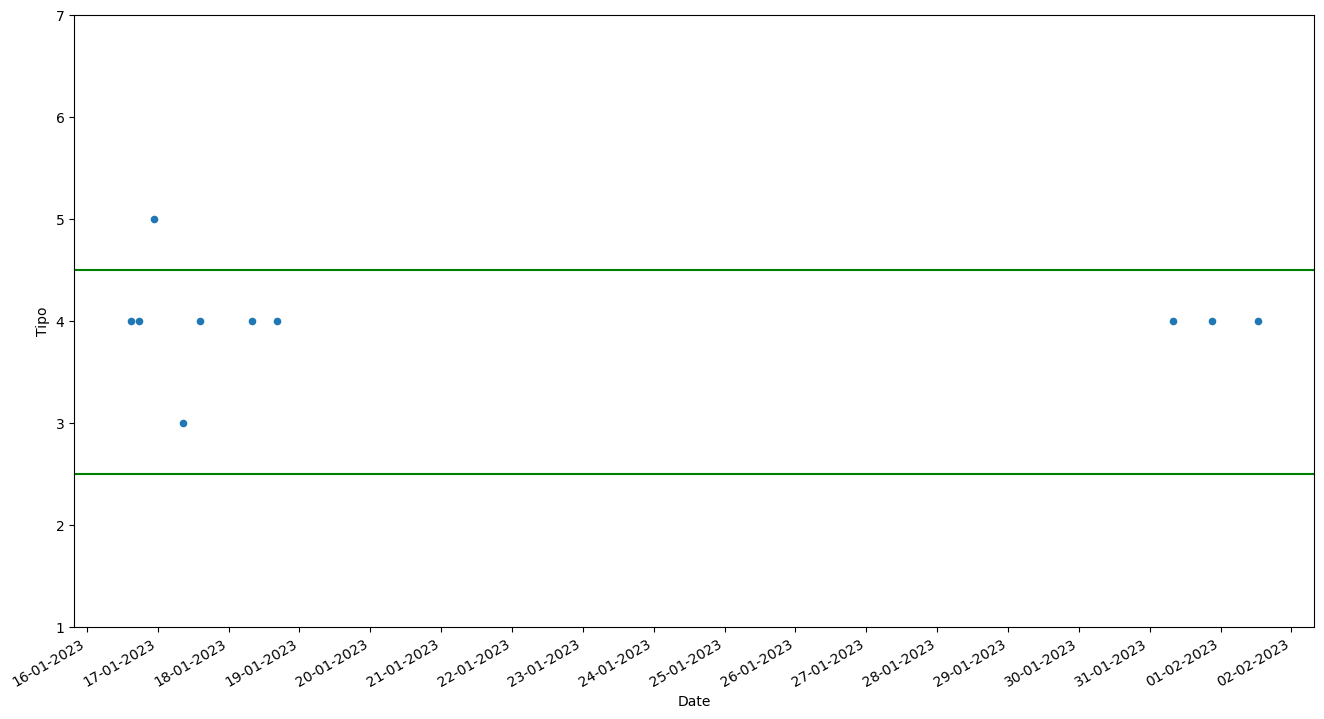

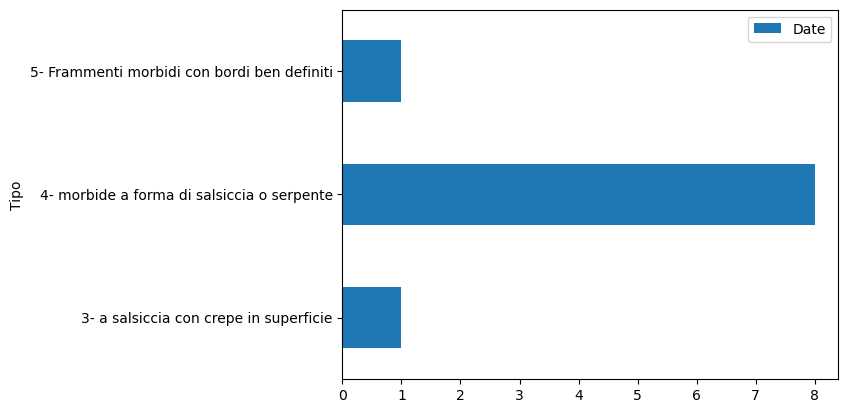

In [115]:
plot_lifestyle('Eliminati cibi')

Eliminazione latticini e formaggi molli dalla dieta.

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

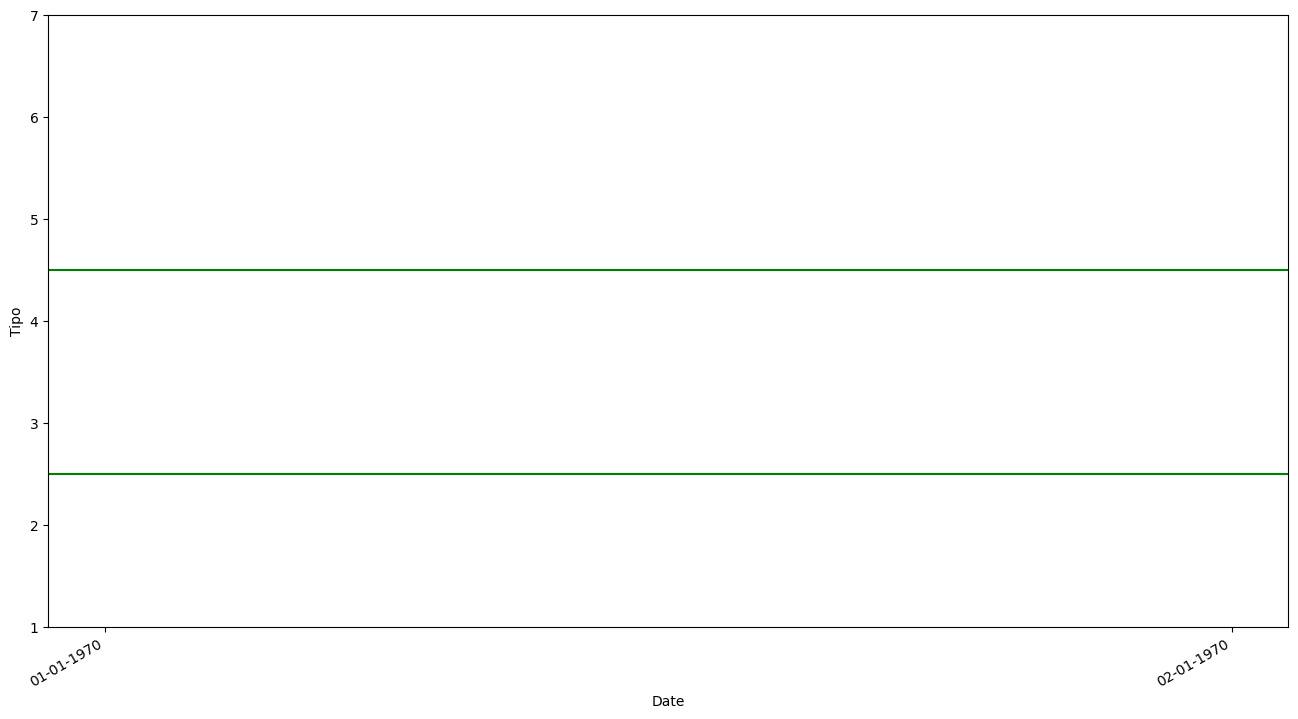

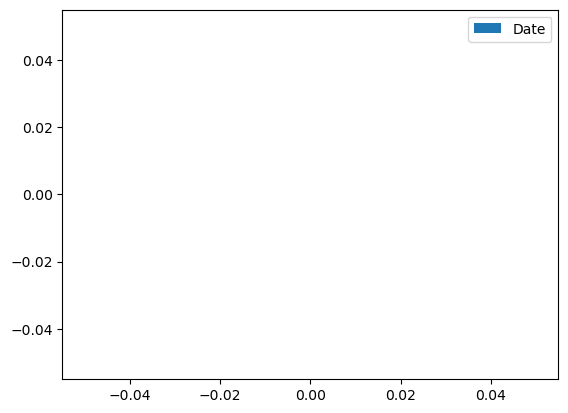

In [116]:
plot_lifestyle('Eliminato latte')

Eliminazione caffè dalla dieta

/Users/aletheia/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: index 0 is out of bounds for axis 0 with size 0

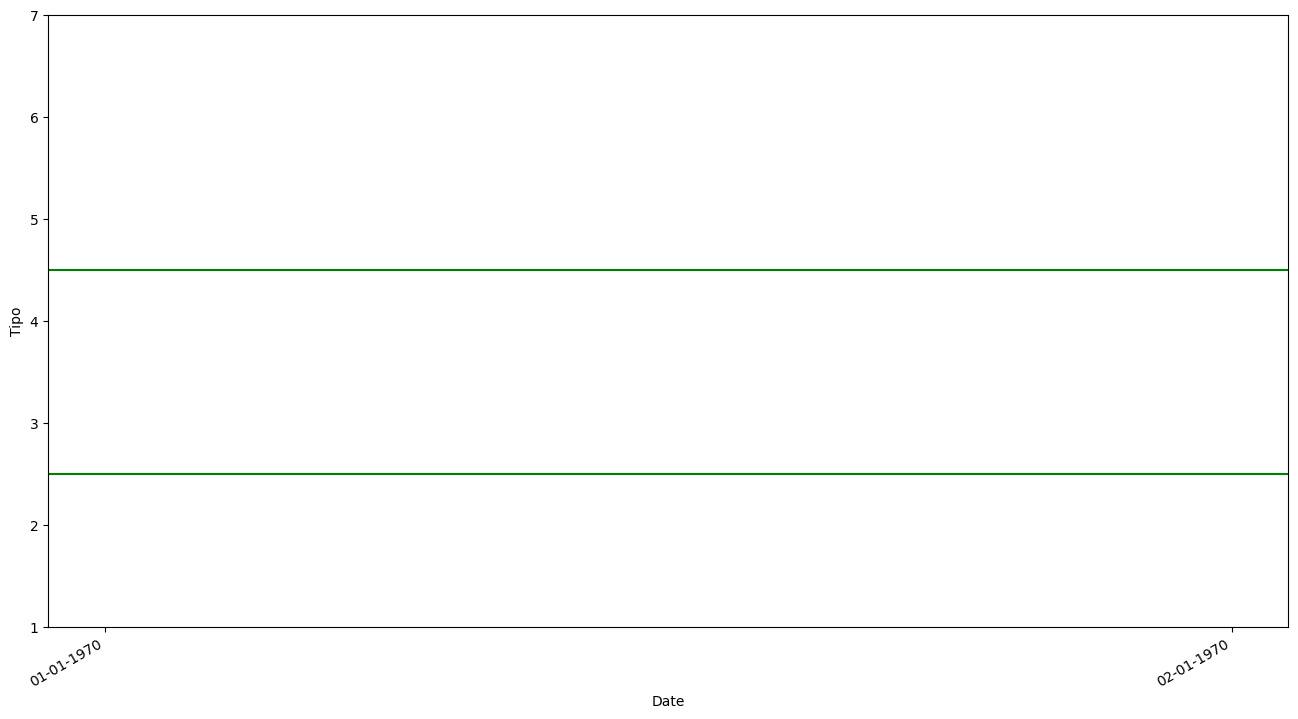

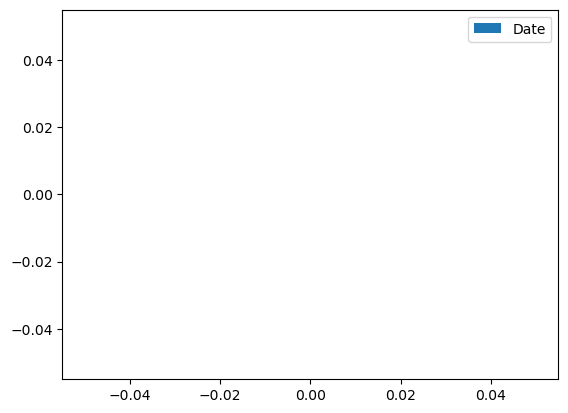

In [117]:
plot_lifestyle('Eliminato caffè')